# CSCI 2820 - LINEAR ALGEBRA - Spring 2025





Make sure you fill in any place that says `CODE SOLUTION HERE` or "CODE SOLUTION HERE", as well as your NAMES below:

In [1]:
NAMES = ""



# FINAL PROJECT (Option 4):  Computer Graphics


In [2]:
## This is a Jupyter notebook for the CU Linear Algebra Final Project.
## Professor Divya E. Vernerey
## Spring 2025

In [3]:
# Add libraries you are using
!pip install numpy
!pip install matplotlib


zsh:1: command not found: pip
zsh:1: command not found: pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt


Run the below cell to view graphics

In [5]:
# @title Please run the Code cell below to view graphics
def plot_transformation(original_points, transformed_points, transformation_name):
    """
    Plots original and transformed shapes side-by-side.

    Parameters:
        original_points (numpy array): Nx2 array of original points.
        transformed_points (numpy array): Nx2 array of transformed points.
        transformation_name (str): Name of the transformation applied.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Fixed axis limits
    x_limits = (-6, 6)
    y_limits = (-6, 6)

    # Plot Original Shape
    axes[0].set_facecolor("#DDEEFF")
    axes[0].plot(original_points[:, 0], original_points[:, 1], 'k-', linewidth=2, label="Original")
    axes[0].fill(original_points[:, 0], original_points[:, 1], color='skyblue', alpha=0.7)
    axes[0].axhline(0, color='black', linewidth=1, linestyle="--")
    axes[0].axvline(0, color='black', linewidth=1, linestyle="--")
    axes[0].set_xlim(x_limits)
    axes[0].set_ylim(y_limits)
    axes[0].set_title("Original Shape", fontsize=14, fontweight='bold', color="navy")
    axes[0].legend(fontsize=10, loc="upper left", frameon=True, facecolor="white", edgecolor="gray")

    # Label each point of the original shape
    for i, (x, y) in enumerate(original_points[:-1]):
        axes[0].text(x, y, f"({x:.2f}, {y:.2f})", fontsize=12, fontweight='bold', color="darkblue", verticalalignment='bottom', horizontalalignment='right')

    # Plot Transformed Shape
    axes[1].set_facecolor("#DDEEFF")
    axes[1].plot(transformed_points[:, 0], transformed_points[:, 1], 'k-', linewidth=2, label=transformation_name)
    axes[1].fill(transformed_points[:, 0], transformed_points[:, 1], color='lightcoral', alpha=0.7)
    axes[1].axhline(0, color='black', linewidth=1, linestyle="--")
    axes[1].axvline(0, color='black', linewidth=1, linestyle="--")
    axes[1].set_xlim(x_limits)
    axes[1].set_ylim(y_limits)
    axes[1].set_title(f"{transformation_name}", fontsize=14, fontweight='bold', color="darkred")
    axes[1].legend(fontsize=10, loc="upper left", frameon=True, facecolor="white", edgecolor="gray")

    # Label each point of the transformed shape
    for i, (x, y) in enumerate(transformed_points[:-1]):
        axes[1].text(x, y, f"({x:.2f}, {y:.2f})", fontsize=12, fontweight='bold', color="darkred", verticalalignment='bottom', horizontalalignment='right')

    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt

def plot_2d_conversion(points_2d_again):
    """
    Plots converted 2D coordinates after transforming from homogeneous coordinates.

    Parameters:
        points_2d_again (numpy array): Nx2 array of converted 2D coordinates.
    """
    if points_2d_again is None:
        raise NotImplementedError("You need to write the return statement in the from_homogeneous function!")

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_facecolor("#E6F7FF")  # Light blue background

    # Plot the converted 2D points
    ax.plot(points_2d_again[:, 0], points_2d_again[:, 1], 'ko-', linewidth=2, label="Converted Back to 2D")
    ax.fill(points_2d_again[:, 0], points_2d_again[:, 1], color='lightgreen', alpha=0.7)

    # Reference Axes
    ax.axhline(0, color='black', linewidth=1, linestyle="--")
    ax.axvline(0, color='black', linewidth=1, linestyle="--")

    # Set limits and remove ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-6, 6)  # Fixed range for consistency
    ax.set_ylim(-6, 6)

    # Titles and Legends
    ax.set_title("Converted Back to 2D Coordinates", fontsize=14, fontweight='bold', color="darkgreen")
    ax.legend(fontsize=10, loc="upper left", frameon=True, facecolor="white", edgecolor="gray")

    # Label each point with coordinates
    for i, (x, y) in enumerate(points_2d_again[:-1]):
        vertical_offset = -0.15 if i == 0 else 0.05  # Adjust label placement
        ax.text(x, y + vertical_offset, f"({x:.2f}, {y:.2f})", fontsize=12, fontweight='bold', color="darkgreen",
                verticalalignment='bottom' if i != 0 else 'top', horizontalalignment='center')

    plt.show()


# **Part 1**
# **Computer Graphics and Transformations with Linear Algebra**

## **Background**  
Imagine you are a **computer graphics engineer** working on a **2D game engine**.  
Your task is to build a **transformation module** that allows **characters, objects, and UI elements** to be scaled, rotated, translated, and sheared dynamically.

You need to implement **fundamental transformations** in a way that is efficient and mathematically robust using **homogeneous coordinates and matrix operations**.

## **Objective**

This project explores Computer Graphics Transformations using Linear Algebra, focusing on:

- Homogeneous Coordinates and their role in transformations.
- Shear and Scale Transformations to approximate Rotation.
- Eigenvalues and Eigenvectors in Transformation Matrices.
- Applying Transformations to Images using Python.


## Exercise 1: Homogeneous Coordinates and Transformations






###  Task 1 : Homogeneous Coordinates :



Each point $(x, y)$ in $\mathbb{R}^2$ can be identified with the point $(x, y, 1)$ on the plane in $\mathbb{R}^3$ that lies one unit above the xy-plane.
We say that (x, y) has **homogeneous coordinates** (x, y, 1).
For instance, the point (0, 0) has homogeneous coordinates (0, 0, 1).

Homogeneous coordinates for points are **not** added or multiplied by scalars, but they **can be transformed** via multiplication by $(3 \times 3)$ matrices.


**Convert 2D points to homogeneous coordinates and back.**

1. Complete the function to convert a set of 2D points to homogeneous coordinates.
2. Complete the function to convert homogeneous coordinates back to 2D.

In [6]:

points_2d = np.array([
    [0, 3],
    [-2.5, -1],
    [2.5, -1],
    [0, 3]
], dtype=float)



In [7]:
import numpy as np
import matplotlib.pyplot as plt

points_2d = np.array([
    [0, 3],
    [-2.5, -1],
    [2.5, -1],
    [0, 3]
], dtype=float)




# TODO: Define function to convert 2D points to homogeneous coordinates
def to_homogeneous(points):
    x = 0
    int(x)
    ones = np.array([[]])
    length = len(points)
    print(points)
    for x in range(length):
        ones = np.append(ones,[[1]], axis=1 )

    ones = ones.reshape(length,1)
    print(ones)
    points = np.hstack((points,ones))

    
    print(points)
    return points
    

   
            

    """Convert Nx2 array of points to Nx3 homogeneous coordinates."""
 # Code Solution here









#Do not change the code below

points_hom = to_homogeneous(points_2d)

print("Homogeneous Points:\n", points_hom)


[[ 0.   3. ]
 [-2.5 -1. ]
 [ 2.5 -1. ]
 [ 0.   3. ]]
[[1.]
 [1.]
 [1.]
 [1.]]
[[ 0.   3.   1. ]
 [-2.5 -1.   1. ]
 [ 2.5 -1.   1. ]
 [ 0.   3.   1. ]]
Homogeneous Points:
 [[ 0.   3.   1. ]
 [-2.5 -1.   1. ]
 [ 2.5 -1.   1. ]
 [ 0.   3.   1. ]]


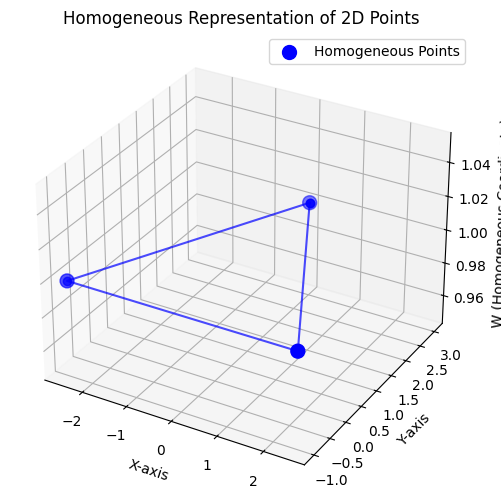

In [8]:
if points_hom is None:
    raise NotImplementedError("You need to write the return statement in the to_homogeneous function!")
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


x_hom, y_hom, w_hom = points_hom[:, 0], points_hom[:, 1], points_hom[:, 2]


ax.scatter(x_hom, y_hom, w_hom, color='blue', s=100, label="Homogeneous Points")
ax.plot(x_hom, y_hom, w_hom, 'bo-', alpha=0.7)


ax.set_title("Homogeneous Representation of 2D Points")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("W (Homogeneous Coordinate)")
ax.legend()
ax.grid(True)

plt.show()

Converted Back to 2D:
 [[ 0.   3. ]
 [-2.5 -1. ]
 [ 2.5 -1. ]
 [ 0.   3. ]]


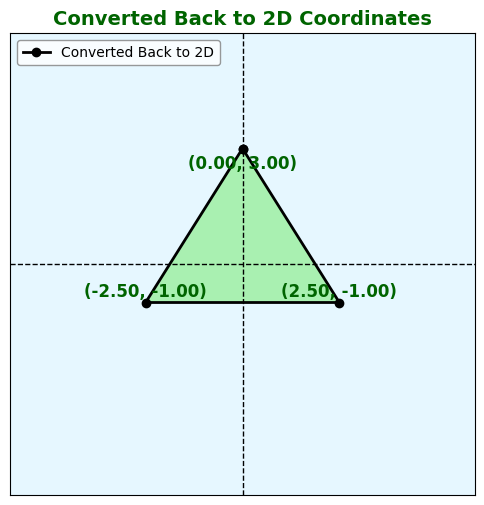

In [9]:
# TODO: Define function to convert homogeneous coordinates back to 2D
def from_homogeneous(h_points):
    """Convert Nx3 homogeneous points back to Nx2 Cartesian coordinates."""
    h_points = np.delete(h_points, 2, 1)
    return h_points




# Do no touch the code below
points_2d_again = from_homogeneous(points_hom)

print("Converted Back to 2D:\n", points_2d_again)
plot_2d_conversion(points_2d_again)


Run the Code below to get graphics for all transformations

### Task 2 : Scaling:



 An object is represented by a set of points (x, y). If we want to **resize** the object, we scale each point by a factor:

$$
x' = s_x \cdot x \quad y' = s_y \cdot y
$$


where $s_x $ and $s_y $ are the **scaling factors**:

- If \( $s_x$, $s_y$ > 1 \) → The object **expands** (zoom in).
- If \( 0 < $s_x$, $s_y$ < 1 \) → The object **shrinks** (zoom out).
- If \( $s_x \neq s_y$ \) → The object is **stretched non-uniformly**.


We can represent **scaling** as a **matrix multiplication** using **homogeneous coordinates**:

$$
S =
\begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Applying this to a point $(x, y, 1)$:

$$
\begin{bmatrix}
s_x & 0 & 0 \\
0 & s_y & 0 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
=
\begin{bmatrix}
s_x \cdot x \\
s_y \cdot y \\
1
\end{bmatrix}
$$

Each point is **multiplied** by the **scaling matrix**, resulting in a **scaled version**.


Let’s say we **scale an object by a factor of 3**:

$$
S =
\begin{bmatrix}
3 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

For a point $(2,1)$:

$$
\begin{bmatrix}
3 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
2 \\
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
6 \\
3 \\
1
\end{bmatrix}
$$

 The **new point** is **(6,3)** → The object **expands by a factor of 3**.


Task 2:

1. Define the 3×3 scaling matrix such that:

- The x-axis is scaled by 0.8.
- The y-axis is scaled by 0.5 .
2. Use the homogenous points from previous task.
3. Apply the scaling matrix and give back the scaled matrix in 2-D format back.






[[ 0.   3. ]
 [-2.5 -1. ]
 [ 2.5 -1. ]
 [ 0.   3. ]]
[[1.]
 [1.]
 [1.]
 [1.]]
[[ 0.   3.   1. ]
 [-2.5 -1.   1. ]
 [ 2.5 -1.   1. ]
 [ 0.   3.   1. ]]
Original Points:
 [[ 0.   3. ]
 [-2.5 -1. ]
 [ 2.5 -1. ]
 [ 0.   3. ]]
Scaled Points:
 [[ 0.    2.4 ]
 [-1.25 -0.5 ]
 [ 2.5  -1.  ]
 [ 0.    2.4 ]]


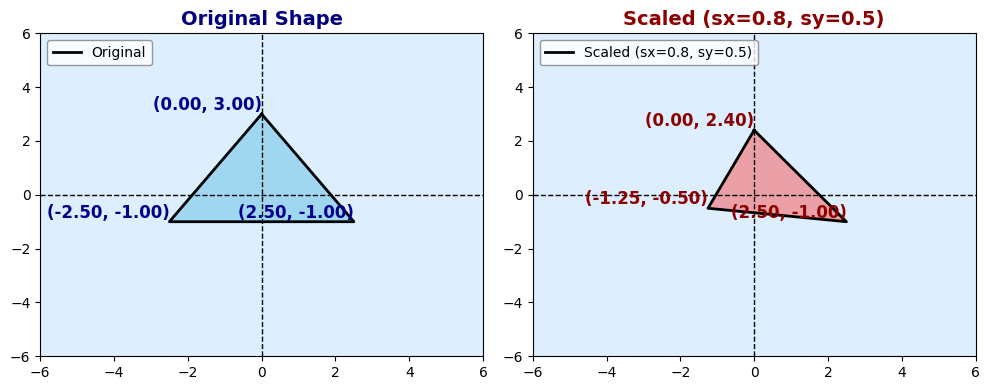

In [10]:
# TODO: Define function to apply scaling
def scale(points, sx, sy):
    """Apply scaling transformation using homogeneous coordinates."""
    homo_points = to_homogeneous(points)
    scaling_matrix = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    adding_matrix = np.array([[0],[0],[0]])
    length = len(homo_points)
    x = 0
    int(x)
    for x in range(length-3):
        scaling_matrix=np.hstack((scaling_matrix,adding_matrix))
    homo_points = np.dot(scaling_matrix,homo_points)
    homo_points = np.vstack((homo_points, homo_points[0]))
    points = from_homogeneous(homo_points)
    return points

# Code SOlution here



sx,sy = 0.8,0.5
scaled_points= scale(points_2d, sx, sy)
print("Original Points:\n", points_2d)
print("Scaled Points:\n", scaled_points)
plot_transformation(points_2d, scaled_points, "Scaled (sx=0.8, sy=0.5)")


### Task 3 :Translation:



Translation moves an object **without changing** its size or orientation.

To translate a point $(x, y)$ by $t_x, t_y$, we use:

$$
x' = x + t_x \quad y' = y + t_y
$$

In **homogeneous coordinates**, translation is represented as a 3 x 3 matrix:

$$
T =
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
$$

Applying this to a point \((x, y, 1)\):

$$
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
=
\begin{bmatrix}
x + t_x \\
y + t_y \\
1
\end{bmatrix}
$$

Each point is **added** with the translation vector $$(t_x, t_y)$$, moving it to a new position.



Task 3:
1. Define the **translation matrix \( T \)** that:
   - Moves all points **3 units right**.
   - Moves all points **-2 units down**.
2. Apply \( T \) to the given points.
3. Convert the translated **homogeneous coordinates** back to **2D**.





Translated Points:
 [[ 3.   1. ]
 [ 0.5 -3. ]
 [ 5.5 -3. ]
 [ 3.   1. ]]


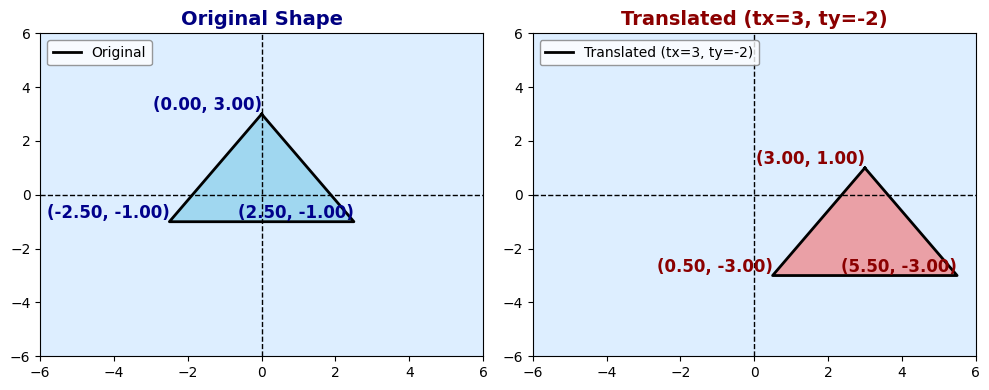

In [11]:
# TODO: Define function to apply translation
def translate(points, tx, ty):
    """Apply translation transformation using homogeneous coordinates."""

    #Code Solution Here
    n = points.shape[0]
    ones = np.ones((n, 1))
    homogeneous_points = np.hstack([points, ones])
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    translated_homogeneous = homogeneous_points @ T.T
    return translated_homogeneous[:, :2]

# Apply translation
tx, ty = 3,-2
translated_points = translate(points_2d, tx, ty)
print("Translated Points:\n", translated_points)
plot_transformation(points_2d, translated_points, "Translated (tx=3, ty=-2)")


### Task 4 : Rotation:


Rotation spins an object **counterclockwise** around the **origin** by an angle $\theta$.

The **new coordinates** after rotation are:

$$
x' = x \cos \theta - y \sin \theta
$$
$$
y' = x \sin \theta + y \cos \theta
$$

In **homogeneous coordinates**, the **$(3 \times 3)$ rotation matrix** is:

$$
R =
\begin{bmatrix}
\cos \theta & -\sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Applying this to a point $$(x, y, 1)$$:

$$
\begin{bmatrix}
\cos \theta & -\sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
=
\begin{bmatrix}
x \cos \theta - y \sin \theta \\
x \sin \theta + y \cos \theta \\
1
\end{bmatrix}
$$

Each point is **rotated** around the origin by **$(\theta)$ degrees**.



**Example Calculation:**
Let’s **rotate** a point (2,1) **by $90^\circ$ counterclockwise**:

$$
R =
\begin{bmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Applying to \((2,1,1)\):

$$
\begin{bmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
2 \\
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
-1 \\
2 \\
1
\end{bmatrix}
$$

 **New position** is **(-1,2)**.

Task 4:
1. Define the **rotation matrix \( R \)** that:
   - Rotates all points **by $45^\circ$ clockwise**.
2. Apply \( R \) to the given points.
3. Convert the rotated **homogeneous coordinates** back to **2D**.



Rotated Points:
 [[ 2.12132034  2.12132034]
 [-2.47487373  1.06066017]
 [ 1.06066017 -2.47487373]
 [ 2.12132034  2.12132034]]


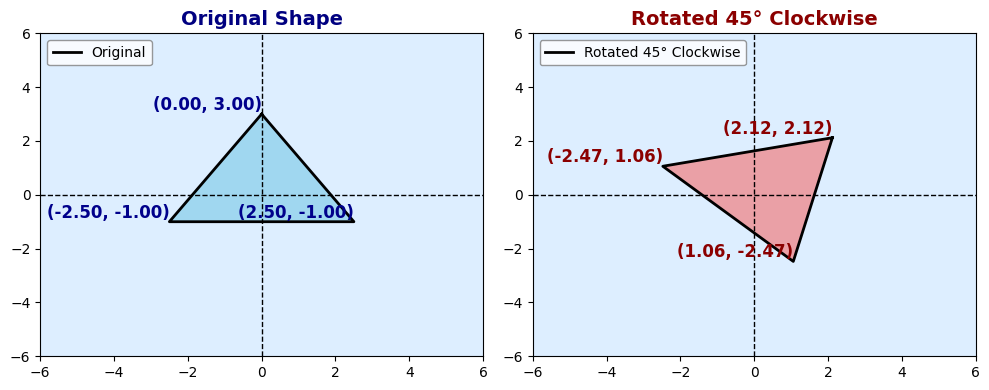

In [12]:
# TODO: Define function to apply rotation
def rotate(points, theta_deg):
    """Apply rotation transformation about the origin using homogeneous coordinates."""

    #CodeSolution here
    theta_rad = np.deg2rad(theta_deg)
    cos_theta = np.cos(theta_rad)
    sin_theta = np.sin(theta_rad)

    R = np.array([
        [cos_theta, -sin_theta, 0],
        [sin_theta,  cos_theta, 0],
        [0,          0,         1]
    ])

    n = points.shape[0]
    ones = np.ones((n, 1))
    homogeneous_points = np.hstack([points, ones])

    rotated_homogeneous = homogeneous_points @ R.T
    return rotated_homogeneous[:, :2]

theta_deg = -45
rotated_points = rotate(points_2d, theta_deg)
print("Rotated Points:\n", rotated_points)
plot_transformation(points_2d, rotated_points, "Rotated 45° Clockwise")


## Exercise 2: Reflection and Transformations



###  Task 5 : Reflection Transformation



Reflection flips an object across a line. The most common reflections are:

- **Across the x-axis**: The y-coordinates are negated.
- **Across the y-axis**: The x-coordinates are negated.
- **Across the line** $ y = x $: x and y coordinates are swapped.

---

**Reflection Matrices**

Reflection across the x-axis
$$
R_x =
\begin{bmatrix}
1 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Reflection across the y-axis
$$
R_y =
\begin{bmatrix}
-1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Reflection across the line $ y = x $
$$
R_{xy} =
\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$


 **Task 5: Implement Reflection**
1. Define the **reflection matrix** \( R \) based on:
   - Reflection across the **x-axis**.
   - Reflection across the **y-axis**.
   - Reflection across the **line \( y = x \)**.
2. Apply \( R \) to the given **homogeneous points**.
3. Convert the **transformed points** back to **2D format**.

Original Points:
 [[ 0.   3. ]
 [-2.5 -1. ]
 [ 2.5 -1. ]
 [ 0.   3. ]]
Reflected Points:
 [[ 0.  -3. ]
 [-2.5  1. ]
 [ 2.5  1. ]
 [ 0.  -3. ]]


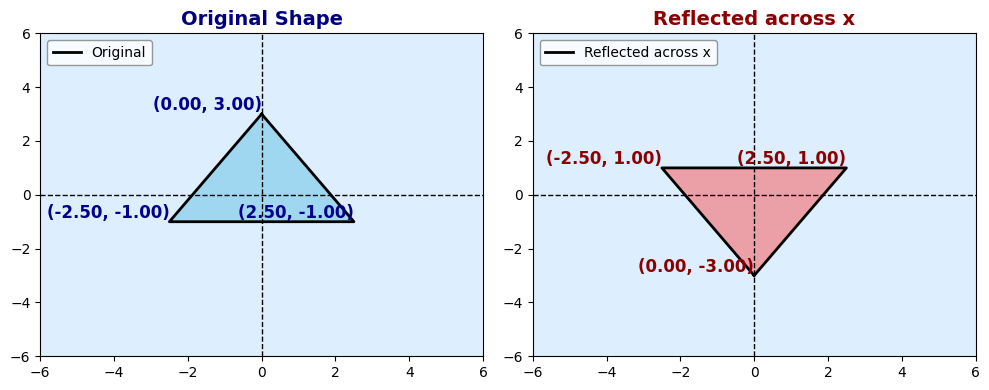

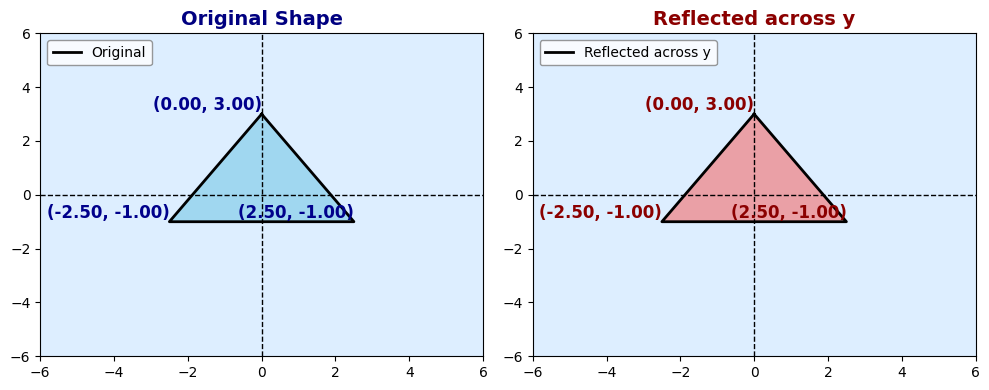

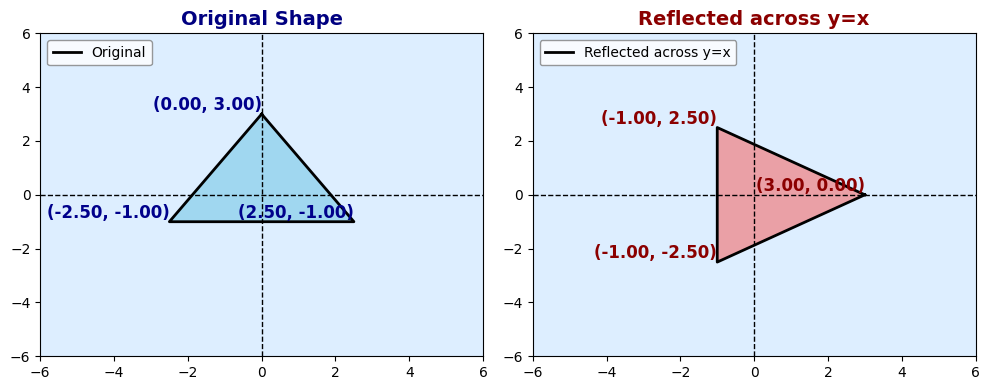

In [ ]:
#Logan E.
def reflect(points, axis):
    
    pts = np.asarray(points, dtype=float)
    # convert to homogeneous coords: (n, 3)
    H = np.hstack([pts, np.ones((pts.shape[0], 1))])

    # choose reflection matrix R
    if axis == 'x':
        R = np.array([[ 1,  0, 0],
                      [ 0, -1, 0],
                      [ 0,  0, 1]])
    elif axis == 'y':
        R = np.array([[-1,  0, 0],
                      [ 0,  1, 0],
                      [ 0,  0, 1]])
    elif axis == 'y=x':
        R = np.array([[ 0, 1, 0],
                      [ 1, 0, 0],
                      [ 0, 0, 1]])
    else:
        raise ValueError(f"Unknown axis '{axis}'. Use 'x', 'y', or 'y=x'.")

    # apply R and convert back to 2D
    H_reflected = H.dot(R.T)
    return H_reflected[:, :2]


# Apply reflection
reflection_axis = 'x'
reflected_points = reflect(points_2d, reflection_axis)

# Print results
print("Original Points:\n", points_2d)
print("Reflected Points:\n", reflected_points)

# Reflect across all three and plot
reflection_axes = ['x', 'y', 'y=x']
reflected_points_dict = {axis: reflect(points_2d, axis) for axis in reflection_axes}

for axis, pts_ref in reflected_points_dict.items():
    plot_transformation(
        original_points=points_2d,
        transformed_points=pts_ref,
        transformation_name=f"Reflected across {axis}"
    )

### Task 6 : Composite Affine Transformation: Scaling, Rotation, and Translation  



In **computer graphics**, applying multiple transformations separately can be inefficient. Instead, we combine **scaling, rotation, and translation** into a **single transformation matrix** using matrix multiplication.


**Composite Transformation Formula**

To apply **scaling, rotation, and translation** in **one step**, we multiply the transformation matrices in the following order:

$$
M = T \cdot R \cdot S
$$

Where:
- \( S \) is the **scaling matrix**.
- \( R \) is the **rotation matrix**.
- \( T \) is the **translation matrix**.

Once computed, we **apply** \( M \) to **each point** to transform it in one step.

---

**Example: Composite Transformation**

Let’s **scale, rotate, and translate** an object with the following transformations:
- **Scale** by $ 2 $ along $x $ and $ 3 $ along $ y $.
- **Rotate** by $ 45^\circ $ counterclockwise.
- **Translate** by $ (5, -3) $

**Example Calculation:**
$$
M = T \cdot R \cdot S
$$

Expanding:

$$
M =
\begin{bmatrix}
1 & 0 & 5 \\
0 & 1 & -3 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
\cos 45^\circ & -\sin 45^\circ & 0 \\
\sin 45^\circ & \cos 45^\circ & 0 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Multiplying these **gives the final composite matrix** that we can apply to points.


**Task 6: Implement Composite Transformations**
Each task below is independent (This means:
For Task 6.1, Task 6.2, Task 6.3 → You should NOT apply transformations one after the other on the same already-transformed points.
Instead → For each subtask, start with the original points_2d again.) — use the original points for each transformation.

You can use the functions written in the tasks above for reflections, translations etc.

1. Translate by $(-2,3)$, then Scale $x $ by 0.8 and $ y $ by 1.2. Compute how the area of any shape changes due to the scaling transformation.
2. Reflect Through the X-Axis, then Rotate by $ 30^\circ $
3. Rotate points through $60^\circ $ about the point $(6,8)$


In [14]:
def composite_transform(points, sx, sy, theta_deg, tx, ty):
  pass #Code SOlution Here


transformed_points = composite_transform(points_2d, sx, sy, theta_deg, tx, ty)

# Print results
print("Original Points:\n", points_2d)
print("Transformed Points:\n", transformed_points)

Original Points:
 [[ 0.   3. ]
 [-2.5 -1. ]
 [ 2.5 -1. ]
 [ 0.   3. ]]
Transformed Points:
 None



## Exercise 3 : Shear Transformation


### Explanation about Shear Transformations


A **shear transformation** is a type of **linear transformation** that slants an object **horizontally** or **vertically** while preserving **area** and **parallel lines**.

Unlike **scaling**, which changes the **size**, or **rotation**, which changes the **orientation**, shear **shifts points proportionally** along an axis.

#### **Horizontal Shear (Shearing Along X-Axis)**
A **horizontal shear** moves each point **horizontally** by an amount **proportional** to its **y-coordinate**.

The **transformation matrix** for **horizontal shear** is:

$$
S_x =
\begin{bmatrix}
1 & k & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Where:  
- \( k \) is the **shear factor** (how much the object is "slanted").
- If \( k > 0 \), the object is **sheared rightward**.
- If \( k < 0 \), the object is **sheared leftward**.


#### **Example: Horizontal Shear**
Shear a point **(2,3)** with \( k = 1.5 \):

$$
S_x =
\begin{bmatrix}
1 & 1.5 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Applying to **(2,3,1)**:

$$
\begin{bmatrix}
1 & 1.5 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
2 \\
3 \\
1
\end{bmatrix}
=
\begin{bmatrix}
6.5 \\
3 \\
1
\end{bmatrix}
$$

**New point** is **(6.5, 3)** → The object was **"pushed" rightward**.



#### **Vertical Shear (Shearing Along Y-Axis)**  
A **vertical shear** moves each point **vertically** by an amount **proportional** to its **x-coordinate**.

The **transformation matrix** for **vertical shear** is:

$$
S_y =
\begin{bmatrix}
1 & 0 & 0 \\
k & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Where:  
- \( k \) is the **shear factor**.
- If \( k > 0 \), the object is **sheared upward**.
- If \( k < 0 \), the object is **sheared downward**.


#### **Example: Vertical Shear**
Shear a point **(2,3)** with \( k = 0.8 \):

$$
S_y =
\begin{bmatrix}
1 & 0 & 0 \\
0.8 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Applying to **(2,3,1)**:

$$
\begin{bmatrix}
1 & 0 & 0 \\
0.8 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
2 \\
3 \\
1
\end{bmatrix}
=
\begin{bmatrix}
2 \\
4.6 \\
1
\end{bmatrix}
$$

**New point** is **(2, 4.6)** → The object was **"pushed" upward**.



#### **Combined Shear**
We can **combine horizontal and vertical shear** by multiplying the **two shear matrices**:

$$
S = S_y \cdot S_x
$$

This results in a **more complex slanting effect**, and when combined with **scaling**, it can approximate **rotation**.








**Both the tasks below have to be completed in the same code cell**

### Task 7: Compute the Compression Matrix $C_y $  


A **vertical shear transformation** $ A_1 $ can be expressed as the product of a **compression matrix** $ C_y $ and a **shear matrix** $ S_y $:

$$
A_1 = C_y \cdot S_y
$$

where the **shear matrix** is:

$$
S_y =
\begin{bmatrix}
1 & 0 & 0 \\
\sin \phi & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

and the **given transformation matrix** is:

$$
A_1 =
\begin{bmatrix}
1 & 0 & 0 \\
\sin \phi & \cos \phi & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Compute the compression matrix $C_y$






### **Task 8: Compute the Second Transformation Matrix \( A_2 \)**



The final transformation $ M $ results in a **rotation matrix**:

$$
M = A_2 \cdot A_1
$$

where:

$$
M =
\begin{bmatrix}
\cos \phi & -\sin \phi & 0 \\
\sin \phi & \cos \phi & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

Compute $A_2$, Given $A_1$ from previous task.

Please complete bolth the tasks in the code block below

In [15]:
import numpy as np

def compute_compression_matrix(A1, Sy):
    """
    """
    #Code Solution here
    pass

def compute_second_transformation_matrix(M, A1):
    """
    """
    # Code Solution here
    pass








phi = np.radians(30)


Sy = np.array([
    [1, 0, 0],
    [np.sin(phi), 1, 0],
    [0, 0, 1]
])


A1 = np.array([
    [1, 0, 0],
    [np.sin(phi), np.cos(phi), 0],
    [0, 0, 1]
])


M = np.array([
    [np.cos(phi), -np.sin(phi), 0],
    [np.sin(phi), np.cos(phi), 0],
    [0, 0, 1]
])


Cy = compute_compression_matrix(A1, Sy)
print("Compression Matrix Cy:\n", Cy)


A2 = compute_second_transformation_matrix(M, A1)
print("Second Transformation Matrix A2:\n", A2)


Compression Matrix Cy:
 None
Second Transformation Matrix A2:
 None


## Exercise 4 : Fun Problems






### Task 9 -  Householder Reflection


A **Householder reflection** is a transformation that **reflects a point across a plane**. Given a **unit vector** \( u \), the **reflection matrix** is defined as:

$$
Q = I - 2P, \quad \text{where} \quad P = uu^T
$$

Where:

- \( P \) is the **projection matrix**.
- \( Q \) represents the **reflection transformation**.

The transformation **\( Qx \)** is the **mirror image** of \( x \) **across the plane** perpendicular to \( u \).




Let:

$$
u =
\begin{bmatrix}
0 \\
0 \\
1
\end{bmatrix}
, \quad
x =
\begin{bmatrix}
1 \\
5 \\
3
\end{bmatrix}
$$

**Tasks in Task 9:**
1. Compute the Projection Matrix
2. Compute the Reflection Matrix
3. Compute the Transformations $Px$ , $Qx$




In [16]:

# TODO: Define function to compute the projection matrix
def compute_projection_matrix(u):
    """
    Compute the projection matrix
    """
    pass  # Code Solution Here


def compute_reflection_matrix(u):
    """
    Compute the Householder reflection matrix
    """
    pass  # Code Solution Here


def apply_projection(P, x):
    """
    Apply the projection transformation Px.
    """
    pass  # Code Solution Here


def apply_reflection(Q, x):
    """
    Apply the Householder reflection transformation Qx.
    """
    pass  # Code Solution Here




u = np.array([[0], [0], [1]])
x = np.array([[1], [5], [3]])


P = compute_projection_matrix(u)


Q = compute_reflection_matrix(u)


Px = apply_projection(P, x)
Qx = apply_reflection(Q, x)


print("Projection Matrix P:\n", P)
print("Reflection Matrix Q:\n", Q)
print("Projected Point Px:\n", Px)
print("Reflected Point Qx:\n", Qx)


Projection Matrix P:
 None
Reflection Matrix Q:
 None
Projected Point Px:
 None
Reflected Point Qx:
 None


### Task 10 - RGB Color Mixing


**Problem Statement**
In a graphics engine, we need to blend three colors to create a **target color**. We are given the following RGB values for the available colors:

- **Orange (C₁) = (255, 100, 50)**
- **Green (C₂) = (50, 200, 50)**
- **Purple (C₃) = (100, 50, 255)**

We want to mix these colors to obtain the **target color**:
$
(120, 200, 255)
$


Solve for $ a, b, c $

Use Gaussian elimination or matrix inversion to solve the system:

In [17]:
import numpy as np

def solve_rgb_mixing(A, B):
    """
    Solves the RGB color mixing equation Ax = B for x.

    Parameters:
    A (numpy array): 4x4 Coefficient matrix representing RGB values of base colors and sum constraint.
    B (numpy array): Target RGB color with sum constraint.

    Returns:
    numpy array: Weights for each base color.
    """
    # Code Solution here
    solution = None  # Replace this with the actual solution


    print("Coefficient Matrix (A):")
    print(A)

    print("\nTarget Color (B):")
    print(B)

    print("\nComputed Weights:")
    print(solution)

    return solution  # Ensure the function returns the computed values


### **Task 11: Find the Scaling and Translation Matrix**



You are designing a **2D game** where you need to **scale and shift** a character's position. The character starts at three points:

$
(1,2), (3,4), (5,6)
$

After applying an **unknown scaling factor** and **translation**, the new positions become:

$
(2,5), (6,9), (10,13)
$

**Transformation Equations**

Each transformation follows the general form:

$$
x' = s x + t_x
$$

$$
y' = s y + t_y
$$

Using the given points, we derive the system of equations:

$$
\begin{aligned}
s(1) + t_x &= 2 \\
s(2) + t_y &= 5 \\
s(3) + t_x &= 6 \\
s(4) + t_y &= 9 \\
s(5) + t_x &= 10 \\
s(6) + t_y &= 13
\end{aligned}
$$

**Tasks in Task 11**
1. Express the system in **matrix form**.
2. Solve for **$ s, t_x, t_y $** using **row reduction (Gaussian elimination)**.
3. Write the **final transformation equations** for **$x' $ and $ y' $**.



In [18]:
def find_scaling_translation(A, B):
    """
    Solves for scaling factor (s) and translation values (t_x, t_y)
    using row reduction (Gaussian elimination).

    Parameters:
    A (numpy array): Coefficient matrix.
    B (numpy array): Result matrix.

    Returns:
    numpy array: Solution containing s, t_x, and t_y.
    """

    solution = None

    #Code solution here



    print("Coefficient Matrix (A):")
    print(A)

    print("\nResult Matrix (B):")
    print(B)

    print("\nComputed Solution (Scaling and Translation):")
    print(solution)

    return solution

# **Part 2**

# **Matrix Operations and Image Manipulation: Theory and Transformations**


## **Objective**
This notebook presents exercises related to **matrix operations and image processing** using Python. You will implement functions for various image transformations and modifications. Each section includes a brief explanation, followed by starter code to help you get started.

## **1. Load and Display Image**
### **Theory:**
An image can be represented as a matrix where each element corresponds to a pixel's intensity value. In grayscale images, the matrix is two-dimensional, while in color images, it is three-dimensional (height × width × 3 for RGB channels).

### **Matrix Representation:**
A grayscale image of size (H, W) is represented as:

$$I = \begin{bmatrix} I_{11} & I_{12} & ... & I_{1W} \\
I_{21} & I_{22} & ... & I_{2W} \\
\vdots & \vdots & \ddots & \vdots \\
I_{H1} & I_{H2} & ... & I_{HW} \end{bmatrix}$$\
Each entry  $I_{ij}$ represents the intensity of a pixel at row \(i\) and column \(j\).



---


### **Exercise 1:**
Download an image of your choice change the path and implement all the functions accordingly.\
Fill in the function `load_image` to read an image in either grayscale or color mode.


In [19]:
# Add libraries you are using
!pip install numpy, matplotlib, cv2, tensorflow, pillow, opencv-python

zsh:1: command not found: pip


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path, grayscale=True):
    """
    Load an image from the given path.
    - If grayscale=True, load as a grayscale image.
    - Otherwise, load in color.
    """
    # Your code here
    pass

def show_image(img, title="Image"):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and display the image
image_path = 'your_image_path_here'  # Provide an image path
img = load_image(image_path)
show_image(img, "Original Image")



ModuleNotFoundError: No module named 'cv2'


## **2. Image Properties**
### **Theory:**
Basic image properties include:
- **Shape (H, W, C):** Height, Width, and Channels (for RGB images).
- **Data Type:** Integer values (0-255 for 8-bit images).
- **Min/Max Intensity Values:** Determines the brightness range of the image.

### **Matrix Representation:**
Each pixel intensity is stored in a matrix, and we can analyze properties by computing:
- **Min:** $$ \min(I) $$
- **Max:** $$ \max(I) $$
- **Mean:** $$ \frac{1}{H \times W} \sum_{i=1}^{H} \sum_{j=1}^{W} I_{ij} $$

---
### **Exercise 2:**
Implement a function to print image dimensions, data type,  min ,max and mean pixel values.



In [ ]:
def image_properties(img):
    """
    Print the properties of an image, including dimensions, data type, min,  max, and  mean pixel values.
    """
    # Your code here
    pass

image_properties(img)






## **3. Image Cropping**
### **Theory:**
Cropping an image involves selecting a submatrix of the original matrix, effectively zooming into a region of interest.

### **Matrix Representation:**


---
A given image $( I )$ of shape $( H \times W )$ can be indexed using matrix slicing:

$$
I' = I[Y_s:Y_e, X_s:X_e]
$$

where:

$$
X_s = \frac{W - \text{crop}_x}{2}, \quad X_e = X_s + \text{crop}_x
$$

$$
Y_s = \frac{H - \text{crop}_y}{2}, \quad Y_e = Y_s + \text{crop}_y
$$

This is analogous to multiplying by an identity matrix where the cropped region retains its values, and the rest of the matrix is ignored.

---
### **Exercise 3:**
Implement a function to crop the central portion of an image.



In [ ]:

def crop_center(img, crop_x, crop_y):
    """
    Crop the central region of the image with dimensions (crop_x, crop_y).
    """
    # Your code here
    pass

cropped_img = crop_center(img, 100, 100)
show_image(cropped_img, "Cropped Image")



## **4. Image Flipping**
### **Theory:**
Flipping an image involves reversing its rows (vertical flip) or columns (horizontal flip).

### **Matrix Operations:**
- **Vertical Flip:** Reverse row order:
  $$
  I' = I[::-1, :]
  $$
- **Horizontal Flip:** Reverse column order:
  $$
  I' = I[:, ::-1]
  $$
- **Transpose (90-degree rotation):**
  $$
  I' = I^T
  $$

---
### **1. Horizontal Flip**
A horizontal flip means reversing the column order. This can be achieved using matrix multiplication with a reflection matrix $( M_H )$:

$$
M_H = \begin{bmatrix}
0 & 0 & \dots & 1 \\
0 & 0 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 0 & \dots & 0
\end{bmatrix}
$$

Multiplying the image $( I )$ with $( M_H )$:

$$
I' = I \cdot M_H
$$

This swaps the columns of $( I )$, effectively flipping it horizontally.

---

### **2. Vertical Flip**
A vertical flip reverses the row order. This is done using another transformation matrix $( M_V )$:

$$
M_V = \begin{bmatrix}
0 & 0 & \dots & 1 \\
0 & 0 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 0 & \dots & 0
\end{bmatrix}
$$

Multiplying $( M_V )$ with $( I )$:

$$
I' = M_V \cdot I
$$

This swaps the rows of $( I )$, flipping it vertically.

### **Exercise 4:**
Implement a function to flip an image horizontally and vertically.



In [ ]:
def flip_image(img, direction):
    """
    Flip the image either horizontally or vertically based on direction.
    direction='horizontal' or 'vertical'
    """
    # Your code here
    pass

flipped_img = flip_image(img, 'horizontal')
show_image(flipped_img, "Horizontally Flipped")
flipped_img = flip_image(img, 'vertical')
show_image(flipped_img, "Vertically Flipped")



## **5. Black and White Conversion**
### **Theory:**
A black-and-white image contains only two intensity levels (0 and 255), obtained by thresholding a grayscale image.

### **Matrix Operation:**
$$
I' = \begin{cases} 255, & I \geq T \\
0, & I < T \end{cases}
$$

where \(T\) is the threshold (typically 128).

---

### **Exercise 5:**
Implement a function that converts an image to black and white based on a threshold.





In [ ]:
def convert_bw(img, threshold=128):
    """
    Convert an image to black and white using a threshold value.
    """
    # Your code here
    pass

bw_img = convert_bw(img)
show_image(bw_img, "Black & White Image")
bw_img = convert_bw(img,200)
show_image(bw_img, "Black & White Image")

## **6: Edge Detection with Sobel Operator**

Edge detection is a fundamental operation in image processing used to identify boundaries and features within an image. One popular method for this is the **Sobel Operator**. The Sobel operator uses two convolutional filters that detect changes in pixel intensity in the horizontal and vertical directions.

- The **Gradient in the X-direction (Gx)** detects vertical edges.
- The **Gradient in the Y-direction (Gy)** detects horizontal edges.

The gradients are calculated using matrix convolution, where the kernel (small matrix) slides over the image and performs element-wise multiplication and summation. The Sobel operator uses the following matrices:

$$
G_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}, \quad
G_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

The final edge magnitude is calculated using the formula:

$$
\text{Edge Magnitude} = \sqrt{G_x^2 + G_y^2}
$$

---

### **Exercise 6:**
Implement a function that applies convolution using these kernels to detect edges


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image

def apply_sobel_filter(img):
    # Your code here: Perform edge detection using Sobel filter
    pass


# Load and apply Sobel filter
image = np.array(Image.open('example.jpg'))
edges = apply_sobel_filter(image)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection with Sobel Filter')
plt.axis('off')
plt.show()

## **7: Image Sharpening using Laplacian Filter**


Image sharpening is achieved using a **Laplacian Filter**, which is a second-order derivative filter. Unlike edge detection, sharpening involves highlighting regions with high-frequency components (rapid intensity changes).

The Laplacian filter is defined as:

$$
L = \begin{bmatrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0
\end{bmatrix}
$$

When applied to an image using convolution, it enhances the edges by detecting areas with high contrast. The output from the Laplacian filter can then be added back to the original image to create a sharper result.




---

### **Exercise 7:**
Implement a function that sharpens the image


In [ ]:
from scipy.ndimage import convolve

def sharpen_image(img):
    # Your code here: Apply Laplacian filter for sharpening
    pass

# Load and apply sharpening filter
sharpened_image = sharpen_image(image)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image with Laplacian Filter')
plt.axis('off')
plt.show()

## Final Discussion:

Please provide a 250-300 word report on what you learned from this project. Provide any more details about the project and expand on your favorite part of the project. Include any other information you have about this.

In [ ]:
## Code solution here.